In [277]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [278]:
pic = cv2.imread('sudoku3.png');

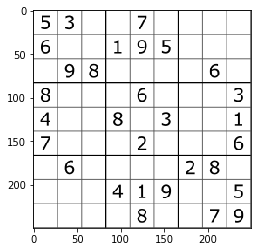

In [279]:
plt.imshow(pic, 'gray');

In [280]:
pic_gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)

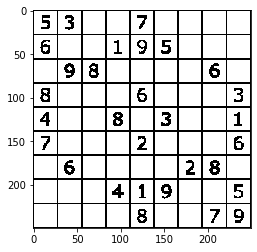

In [281]:
for i in range(pic.shape[0]):
    for j in range(pic.shape[1]):
#         print('x',pic[i,j])
        if(pic[i,j,0] != 255 or pic[i,j,1] != 255 or pic[i,j,2] != 255):
            pic[i,j,0] = 0;
            pic[i,j,1] = 0;
            pic[i,j,2] = 0;

plt.imshow(pic)
pic_gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
plt.imshow(pic_gray, 'gray')

In [282]:
# pic_gray = cv2.medianBlur(pic_gray, 5)
# plt.imshow(pic_gray)

In [283]:
ths, pic_thresh = cv2.threshold(pic_gray, 225, 255, cv2.THRESH_BINARY);

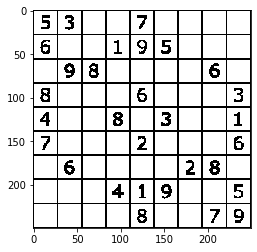

In [284]:
plt.imshow(pic_thresh, 'gray')

In [285]:
contours, h = cv2.findContours(pic_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


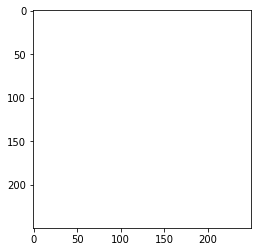

In [286]:
grid = np.ones(pic.shape, dtype = np.float32)*255;
plt.imshow(grid)

In [287]:
for i in range(len(contours)):
    if h[0][i][3] == -1:
        cv2.drawContours(grid, contours, i, (0, 255, 0), 5);

In [288]:
grid = cv2.cvtColor(grid, cv2.COLOR_BGR2GRAY);

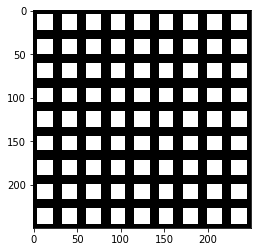

In [289]:
kernel = np.ones((5,5));
# grid = cv2.erode(grid, kernel, iterations = 2);
grid = grid/255;
grid = grid.astype(np.uint8);
plt.imshow(grid, 'gray');

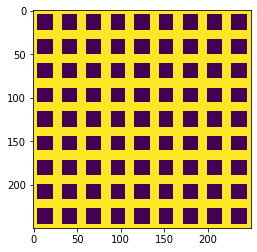

In [290]:
ths, grid_inv = cv2.threshold(grid.copy()*255, 127, grid.max(), cv2.THRESH_BINARY_INV);
plt.imshow(grid_inv);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 0 250 250
226 226 20 20
198 226 20 20
171 226 19 20
143 226 19 20
115 226 20 20
88 226 19 20
60 226 19 20
32 226 20 20
4 226 20 20
226 198 20 20
198 198 20 20
171 198 19 20
143 198 19 20
115 198 20 20
88 198 19 20
60 198 19 20
32 198 20 20
4 198 20 20
226 171 20 19
198 171 20 19
171 171 19 19
143 171 19 19
115 171 20 19
88 171 19 19
60 171 19 19
32 171 20 19
4 171 20 19
226 143 20 19
198 143 20 19
171 143 19 19
143 143 19 19
115 143 20 19
88 143 19 19
60 143 19 19
32 143 20 19
4 143 20 19
226 115 20 20
198 115 20 20
171 115 19 20
143 115 19 20
115 115 20 20
88 115 19 20
60 115 19 20
32 115 20 20
4 115 20 20
226 88 20 19
198 88 20 19
171 88 19 19
143 88 19 19
115 88 20 19
88 88 19 19
60 88 19 19
32 88 20 19
4 88 20 19
226 60 20 19
198 60 20 19
171 60 19 19
143 60 19 19
115 60 20 19
88 60 19 19
60 60 19 19
32 60 20 19
4 60 20 19
226 32 20 20
198 32 20 20
171 32 19 20
143 32 19 20
115 32 20 20
88 32 19 20
60 32 19 20
32 32 20 20
4 32 20 20
226 4 20 20
198 4 20 20
171 4 19 20
143 4 19 20

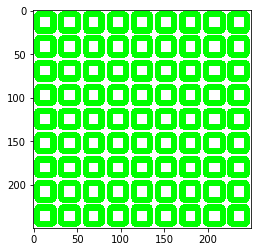

In [291]:
foundgrids = [];
temp = np.ones(pic.shape)
contours, h = cv2.findContours(grid_inv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE);
for i,cnt in enumerate(contours):
    (x,y,w,h) = cv2.boundingRect(cnt);
    print(x,y,w,h)
    if w in range(15, 25) and h in range(15, 25):
        foundgrids.append([x,y,w,h]);
        cv2.drawContours(temp, contours, i, (0, 255, 0), 5);
plt.imshow(temp)

In [292]:
tempgrids = sorted(foundgrids);
foundgrids = [];
for i in range(9):
    foundgrids.extend(sorted(tempgrids[i*9:i*9+9], key = lambda tempgrids: tempgrids[1]));
foundpics = [];
for i, e in enumerate(foundgrids):
    x,y,w,h = e[0],e[1], e[2], e[3];
    temp = pic[x:x+w, y:y+h];
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY);
    temp = cv2.resize(temp, (28,28));
#     ths, temp_thresh = cv2.threshold(temp, 127, temp.max(), cv2.THRESH_BINARY_INV)
#     temp_thresh = temp_thresh.reshape((28,28,1));
    temp = cv2.bitwise_not(temp);
#     temp = temp.reshape((28,28,1));
    foundpics.append(temp);
foundpics = np.array(foundpics)
len(foundpics)

81

In [293]:
# foundpics[9] = foundpics[53]

In [294]:
# for i, x in enumerate(foundpics):
#     plt.title(i);
#     plt.imshow(x.reshape((28,28)), 'gray');
#     plt.show();

In [295]:
from tensorflow.keras.models import load_model
model = load_model('mnistmodel.h5');

In [296]:
import copy
j = -1;
arr = [[] for i in range(9)];
for i, x in enumerate(foundpics):
    num0b = len(x[x == x.min()]);
    num1b = len(x[x == 255]);
    if(i%9 == 0):
        j+=1;
    if num1b/(num0b+num1b) >= 0.03:    
        x_t = x.reshape((1,28,28,1))/255;
        y_pred = model.predict_classes(x_t);      
        arr[j].append(y_pred[0]);
    else:
        arr[j].append(0);
arr_tf = copy.deepcopy(arr);
for i in range(len(arr_tf)):
    for j in range(len(arr_tf[i])):
        if(arr_tf[i][j] != 0):
            arr_tf[i][j] = 1;
arr_tf
arr

[[5, 3, 0, 0, 3, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 5, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [3, 0, 0, 0, 2, 0, 0, 0, 5],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 3, 9]]

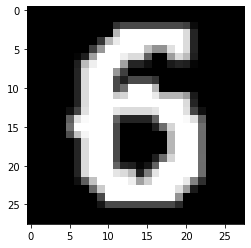

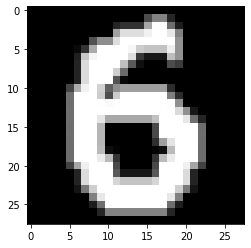

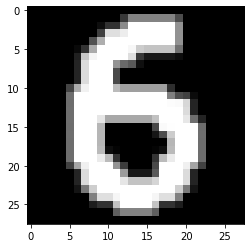

[6] [5] [6]


In [297]:
x = foundpics[9]/255;
plt.imshow(foundpics[9], 'gray');
plt.show();
y1 = model.predict_classes(x.reshape(1,28,28,1));
x = foundpics[53]/255
plt.imshow(x, 'gray');
plt.show();
y2 = model.predict_classes(x.reshape(1,28,28,1));
x = foundpics[55]/255;
plt.imshow(x, 'gray');
plt.show();
y3 = model.predict_classes(x.reshape(1,28,28,1));
print(y1,y2,y3)
x = x.reshape(1,28,28,1);
x = x/255;

In [298]:
def find_empty_location(arr, l): 
    for row in range(9): 
        for col in range(9): 
            if(arr[row][col]== 0): 
                l[0]= row 
                l[1]= col 
                return True
    return False

def used_in_row(arr, row, num): 
    for i in range(9): 
        if(arr[row][i] == num): 
            return True
    return False

def used_in_col(arr, col, num): 
    for i in range(9): 
        if(arr[i][col] == num): 
            return True
    return False
  
def used_in_box(arr, row, col, num): 
    for i in range(3): 
        for j in range(3): 
            if(arr[i + row][j + col] == num): 
                return True
    return False
  
def check_location_is_safe(arr, row, col, num): 
    return not used_in_row(arr, row, num) and not used_in_col(arr, col, num) and not used_in_box(arr, row - row % 3, col - col % 3, num) 

def solve_sudoku(arr):       
    l =[0, 0]       
    if(not find_empty_location(arr, l)): 
        return True
      
    row = l[0] 
    col = l[1] 
      
    for num in range(1, 10):           
        if(check_location_is_safe(arr, row, col, num)):               
            arr[row][col]= num 
  
            if(solve_sudoku(arr)): 
                return True
  
            arr[row][col] = 0
              
    return False 

In [299]:
solve_sudoku(arr);

In [300]:
arr

[[5, 3, 0, 0, 3, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 5, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [3, 0, 0, 0, 2, 0, 0, 0, 5],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 3, 9]]

In [301]:
k = 0;
picc = pic.copy();
for i in range(9):
    for j in range(9):
        if arr_tf[i][j] == 0:
            x,y,w,h = foundgrids[k];
            cv2.putText(picc, text = str(arr[i][j]), org = (y+5, x+w-5), fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 3, color = (255, 0, 0), thickness = 10);
        k+=1;

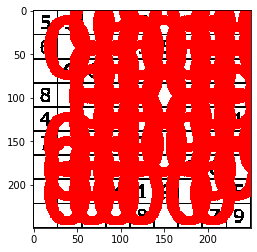

In [302]:
plt.imshow(picc)